# Building Logistic Regression

This document represents the implementation of a logistic regression model from scratch to try out my learning. Logistic regression comes from the Bernoulli distribution in the Exponential family, which is why we use the sigmoid function to model it. It does not have a closed-form solution, so we need to maximize the likelihood or minimize the negative log-likelihood using gradient descent to fit the model. I have used the Iris dataset and fitted the model using gradient descent. Finally, the decision boundary is plotted, and the sklearn inbuilt model is shown for comparison.

In [189]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import add_dummy_feature
import warnings
warnings.filterwarnings("ignore")

In [200]:
df = sns.load_dataset("iris")
m=df[df['species']=="versicolor"].index.to_list()
df=df[~df.index.isin(m)]
df['species']=df['species'].map(lambda x:1 if x=="setosa" else 0)

In [206]:
X = df[["sepal_length"]]
y= df[["species"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#sclaing is required for this data
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#dummy-bias feature (x0=1)
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [207]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def logloss(y_true, y_pred):
    eplison = 1e-15
    y_pred = np.clip(y_pred, eplison, 1 - eplison)
    return -np.mean(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))

def gradient_descent(X,y,alpha,iter):
    y=y.values.reshape(-1,1)
    m,n=X.shape
    theta = np.zeros((n, 1))
    
    for i in range(iter):
        y_pred=sigmoid(np.dot(X,theta))
        theta-= alpha*(1/m)*np.dot(X.T,(y_pred-y))
        
        if i%100==0:
            cost =logloss(y,y_pred)
            print(f"Iteration {i}, Log Loss: {cost}")
            
    return theta

def predict(X, theta):
    y_pred=sigmoid(np.dot(X,theta))
    y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
    return np.array(y_pred_class)

theta=gradient_descent(X_train,y_train,0.1,1000)
print(theta)

Iteration 0, Log Loss: 0.6931471805599453
Iteration 100, Log Loss: 0.2523671577662693
Iteration 200, Log Loss: 0.19673740022310837
Iteration 300, Log Loss: 0.17451881014571277
Iteration 400, Log Loss: 0.1625485449936483
Iteration 500, Log Loss: 0.15510803761168793
Iteration 600, Log Loss: 0.15007340419070325
Iteration 700, Log Loss: 0.14646891630147735
Iteration 800, Log Loss: 0.14378224721422952
Iteration 900, Log Loss: 0.1417182905853419
[[-0.74529965]
 [-4.51823334]]


In [208]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,predict(X_test,theta)))
print(accuracy_score(y_test,predict(X_test,theta)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

0.95


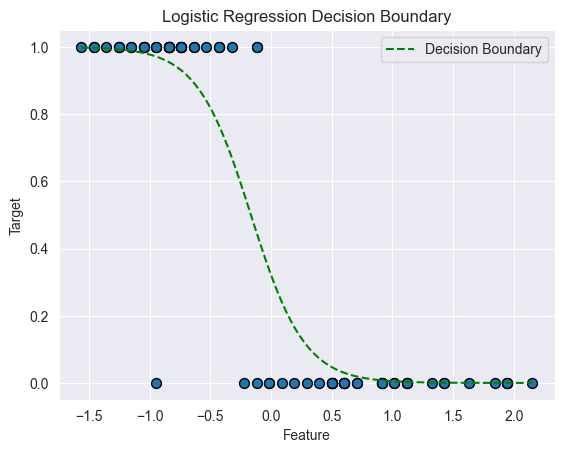

In [209]:
x_values = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
y_values = sigmoid(np.dot(np.c_[np.ones_like(x_values), x_values], theta))

plt.scatter(X_train[:, 1], y_train , edgecolors='k', s=50)

plt.plot(x_values, y_values, color="green", linestyle="--", label="Decision Boundary")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()

# LogisticRegression Model

In [210]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.95